In [31]:
import pandas as pd
import numpy as np
import json
import random

In [32]:
rows = []
for line in open('/content/drive/MyDrive/Sarcasm_Headlines_Dataset.json', 'r'):
    rows.append(json.loads(line))
SPLIT_SIZE=0.9
suffled_set=random.sample(rows,len(rows))
train_length=int(len(suffled_set)*SPLIT_SIZE)
train_set=suffled_set[:train_length]
test_set=suffled_set[train_length:]
print('Total length of the dataset: ',len(suffled_set))
print('Length of the Training dataset: ',len(train_set))
print('Length of the Test dataset: ',len(test_set))

Total length of the dataset:  28619
Length of the Training dataset:  25757
Length of the Test dataset:  2862


In [33]:
train_set[1000]

{'article_link': 'https://www.theonion.com/china-introduces-new-one-uighur-policy-1830475863',
 'headline': 'china introduces new one-uighur policy',
 'is_sarcastic': 1}

In [34]:
stopwords=[ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

In [35]:
def remove_stopwords(sentence):
  for word in stopwords:
    token=' '+word+' '
    sentence=sentence.replace(token,' ')
    sentence=sentence.replace('  ',' ')
  return sentence
  def extract(array):
    headlines=[]
    labels=[]
    for i in range(len(array)):
      labels.append(array[i]['is_sarcastic'])
      headlines.append(remove_stopwords(array[i]['headline']))
  return headlines,labels
train_headlines,train_labels=extract(train_set)
test_headlines,test_labels=extract(test_set)
train_labels=np.array(train_labels)
test_labels=np.array(test_labels)

In [36]:
#Preprocessing the training and test headlines for the word embedding
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_headlines)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(train_headlines)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_headlines)
test_padded = pad_sequences(test_sequences,maxlen=max_length)

# **CONVOLUTIONAL NEURAL NETWORK (CNN)**

In [37]:
#Building the CNN Model
model_conv = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(16,3,activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [38]:

model_conv.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 118, 16)           784       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 59, 16)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 944)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 5670      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 166,461
Trainable params: 166,461
Non-trainable params: 0
________________________________________________

In [39]:
model_conv.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
num_epochs = 20
history=model_conv.fit(padded, train_labels, epochs=num_epochs, validation_data=(test_padded, test_labels))

Epoch 1/20
805/805 [==============================] - 6s 7ms/step - loss: 0.5113 - accuracy: 0.7200 - val_loss: 0.3729 - val_accuracy: 0.8298
Epoch 2/20
805/805 [==============================] - 6s 7ms/step - loss: 0.2828 - accuracy: 0.8833 - val_loss: 0.3619 - val_accuracy: 0.8386
Epoch 3/20
805/805 [==============================] - 6s 7ms/step - loss: 0.2006 - accuracy: 0.9224 - val_loss: 0.3991 - val_accuracy: 0.8354
Epoch 4/20
805/805 [==============================] - 6s 7ms/step - loss: 0.1386 - accuracy: 0.9508 - val_loss: 0.4485 - val_accuracy: 0.8288
Epoch 5/20
805/805 [==============================] - 6s 7ms/step - loss: 0.0872 - accuracy: 0.9722 - val_loss: 0.5320 - val_accuracy: 0.8291
Epoch 6/20
805/805 [==============================] - 6s 7ms/step - loss: 0.0499 - accuracy: 0.9861 - val_loss: 0.6113 - val_accuracy: 0.8267
Epoch 7/20
805/805 [==============================] - 6s 7ms/step - loss: 0.0278 - accuracy: 0.9937 - val_loss: 0.7296 - val_accuracy: 0.8204
Epoch 

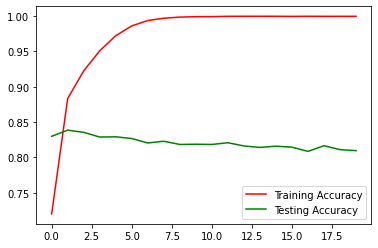

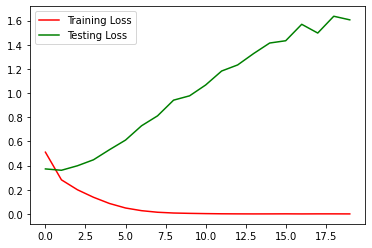

In [40]:
#Evaluating Accuracy and Loss of the model
%matplotlib inline
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) #No. of epochs

#Plot training and validation accuracy per epoch
import matplotlib.pyplot as plt
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Testing Loss')
plt.legend()
plt.show()

In [40]:
Bidirectional LONG SHORT TERM MEMORY (LSTM)

# **Bidirectional LONG SHORT TERM MEMORY (LSTM)**

In [41]:
#Building the LSTM Model
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')])

In [42]:

model_lstm.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 32)                4224      
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 198       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 164,429
Trainable params: 164,429
Non-trainable params: 0
_________________________________________________________________


In [43]:
model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
num_epochs = 20
history2=model_lstm.fit(padded, train_labels, batch_size=1000,epochs=num_epochs, validation_data=(test_padded, test_labels))

Epoch 1/20
26/26 [==============================] - 12s 329ms/step - loss: 0.6911 - accuracy: 0.5221 - val_loss: 0.6883 - val_accuracy: 0.5161
Epoch 2/20
26/26 [==============================] - 8s 304ms/step - loss: 0.6753 - accuracy: 0.6067 - val_loss: 0.6538 - val_accuracy: 0.7264
Epoch 3/20
26/26 [==============================] - 8s 303ms/step - loss: 0.6099 - accuracy: 0.7660 - val_loss: 0.5716 - val_accuracy: 0.7830
Epoch 4/20
26/26 [==============================] - 8s 304ms/step - loss: 0.5066 - accuracy: 0.8154 - val_loss: 0.4975 - val_accuracy: 0.7869
Epoch 5/20
26/26 [==============================] - 8s 306ms/step - loss: 0.4077 - accuracy: 0.8539 - val_loss: 0.4118 - val_accuracy: 0.8187
Epoch 6/20
26/26 [==============================] - 8s 308ms/step - loss: 0.3317 - accuracy: 0.8698 - val_loss: 0.3865 - val_accuracy: 0.8267
Epoch 7/20
26/26 [==============================] - 8s 307ms/step - loss: 0.2756 - accuracy: 0.8920 - val_loss: 0.3711 - val_accuracy: 0.8267
Epoch

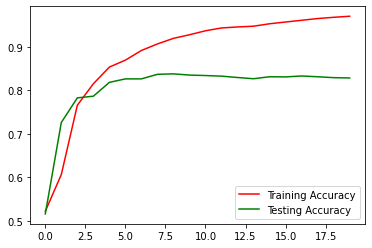

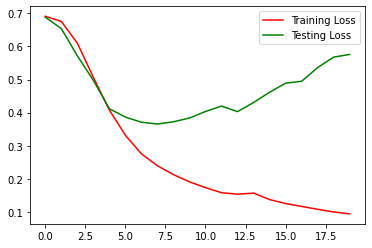

In [44]:
#Evaluating Accuracy and Loss of the model
%matplotlib inline
acc=history2.history['accuracy']
val_acc=history2.history['val_accuracy']
loss=history2.history['loss']
val_loss=history2.history['val_loss']

epochs=range(len(acc)) #No. of epochs

#Plot training and validation accuracy per epoch
import matplotlib.pyplot as plt
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Testing Loss')
plt.legend()
plt.show()